Running Simulation:   0%|                                                                   | 0/200 [00:00<?, ?Steps/s]C:\Users\iris7\AppData\Local\Temp\ipykernel_15504\3884016742.py:9: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt((x[0] - y[0])*2 + (x[1] - y[1])*2)
Running Simulation: 100%|█████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 64.65Steps/s]

<IPython.core.display.Javascript object>


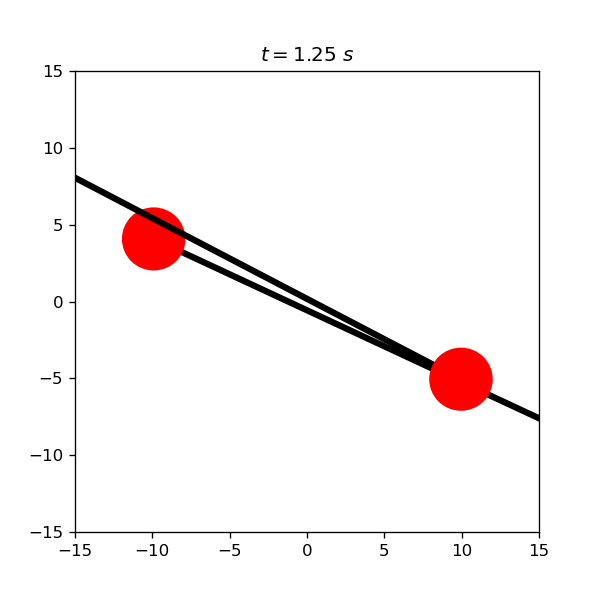

In [14]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep

def Distance(x,y):
    distance = np.sqrt((x[0] - y[0])*2 + (x[1] - y[1])*2)
    return distance

class Particle:

    def __init__(self,r0,v0,a0,t,radius = 2,m=1,Id=0):
        self.dt = t[1] - t[0]

        self.r = r0
        self.v = v0
        self.a = a0

        self.R = np.zeros((len(t), len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.radius = radius
    
    def EvolutionPositionAndVelocity(self, it):
        self.SetPosition(it)
        self.SetVelocity(it)
        
        self.r += self.dt*self.v
        self.v += self.dt*self.a
    
    def SetPosition(self,it):
        self.R[it] = self.r
    
    def SetVelocity(self,it):
        self.V[it] = self.v

    def GetPosition(self, scale = 1):
        return self.R[::scale]
    
    def GetVelocity(self, scale = 1):
        return self.V[::scale]
    
    def CheckLimits(self, Limits):
        for i in range(2):
            if self.r[i] + self.radius > Limits[i][1] and self.v[i] > 0.:
                self.v[i] = -1.0*self.v[i]
            if self.r[i] - self.radius < Limits[i][0] and self.v[i] < 0.:
                self.v[i] = -1.0*self.v[i]
    
    def Collision(self, self_, K=1):
        x0 = self.r[0]
        x1= self_.r[0]
        y0= self.r[1]
        y1= self_.r[1]
        
        distance_ = Distance((x0, y0), (x1, y1))
            
        if distance_ < (2*self.radius):
            Force = (K * distance_**3)*self.r
            #self.v[0] = -1.0*self.v[0]
            #self.v[1] = -1.0*self.v[1]
            #if self_.v[0] == 0:
                #self_.v[0] = 1.0*self.v[0]
            #else:
                #self_.v[0] = self_.v[0] + self.v[0]
            #if self.v[1] == 0:
                #self_.v[1] = 1.0*self.v[1]
            #else:
                #self_.v[1] = self_.v[1] + self.v[1]
            self.a = Force
            self_.a = -Force
        else:
            Force = 0

limits = np.array([[-15., 15.], [-15., 15.]])
dt = 0.05
tmax = 10
t = np.arange(0., tmax, dt)

def RunSimulation(t, limites):

    walls_ = limits.copy()

    r1= np.array([-15., 1.])
    v1= np.array([10., 0.])
    a1= np.array([0., 0.])

    r2= np.array([0., -1.5])
    v2= np.array([0., 0.])
    a2= np.array([0., 0.])

    P1 = Particle(r1, v1, a1, t)
    P2 = Particle(r2, v2, a2, t)
    
    for i in tqdm(range(len(t)), desc='Running Simulation', unit='Steps'):
        sleep(0.0001)

        P1.EvolutionPositionAndVelocity(i)
        P1.CheckLimits(limites)
        P1.Collision(P2)

        P2.EvolutionPositionAndVelocity(i)
        P2.CheckLimits(limites)
        P2.Collision(P1)
    
    return [P1, P2]

time_scale = 1
t = t[::time_scale]

Particle1 = RunSimulation(t,limits)[0]
Particle2 = RunSimulation(t,limits)[1]

print(Particle1)
print(Particle2)


fig1 = plt.figure(figsize = (5,5))
ax = fig1.add_subplot(111)

def init():
    ax.set_xlim(limits[0][0], limits[0][1])
    ax.set_ylim(limits[1][0], limits[1][1])
    
def Update(it):

    ax.clear()
    init() 
    ax.set_title(r'$ t = %.2f \ s$' %(t[it]))
  
    x = Particle1.GetPosition(time_scale)[it, 0]
    y = Particle1.GetPosition(time_scale)[it, 1]
    vx = Particle1.GetVelocity(time_scale)[it, 0]
    vy = Particle1.GetVelocity(time_scale)[it, 1]

    P1 = plt.Circle((x, y), Particle1.radius, fill = True, color = 'r')
    ax.arrow(x, y, vx*0.7, vy*0.7, color = 'k', width = .3, head_width = 1, length_includes_head = True)
    ax.add_patch(P1)

    x1 = Particle2.GetPosition(time_scale)[it, 0]
    y1 = Particle2.GetPosition(time_scale)[it, 1]
    vx1 = Particle2.GetVelocity(time_scale)[it, 0]
    vy1 = Particle2.GetVelocity(time_scale)[it, 1]
    p2 = plt.Circle((x1, y1), Particle2.radius, fill = True, color = 'r')
    ax.arrow(x1, y1, vx1*0.7, vy1*0.7, color = 'k', width = .3, head_width = 1, length_includes_head = True)
    ax.add_patch(p2)
    
    
Animation = anim.FuncAnimation(fig1,Update,frames=len(t),init_func=init)

In [8]:
r2= np.array([0., -1.5])
v2= np.array([0., 0.])

In [9]:
r2-v2

array([ 0. , -1.5])

In [10]:
abs(r2-v2)

array([0. , 1.5])